In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Familiar with data

In [94]:
# preparing data for cook 👨🏻‍🍳
(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [95]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [96]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [97]:
print(train_labels[0])
print(train_data[0].shape)

9
(28, 28)


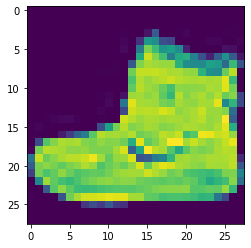

In [98]:
plt.imshow(train_data[0])

0


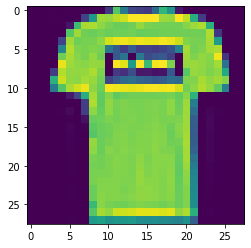

In [99]:
print(train_labels[1])
plt.imshow(train_data[1])

In [100]:
classes = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

def show_indexing(index):
    class_index = train_labels[index]
    print(class_index)
    label = classes[class_index]
    plt.imshow(train_data[class_index])
    plt.title(f"{label}")

7


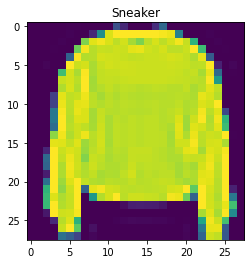

In [101]:
show_indexing(52)

# Building up the model

In [120]:
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

non_norm_history = model1.fit(train_data,train_labels,epochs=25,validation_data=(test_data,test_labels))

Epoch 1/25
  23/1875 [..............................] - ETA: 8s - loss: 8.8560 - accuracy: 0.1359  

2022-07-06 21:01:45.664229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1869/1875 [============================>.] - ETA: 0s - loss: 2.1783 - accuracy: 0.1624

2022-07-06 21:01:54.381848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 2.1769 - accuracy: 0.1626 - val_loss: 1.8039 - val_accuracy: 0.2066
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.7187 - accuracy: 0.2407 - val_loss: 1.6656 - val_accuracy: 0.2878
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6392 - accuracy: 0.2819 - val_loss: 1.6069 - val_accuracy: 0.2839
Epoch 4/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6041 - accuracy: 0.2910 - val_loss: 1.5991 - val_accuracy: 0.2972
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5955 - accuracy: 0.2979 - val_loss: 1.5903 - val_accuracy: 0.3190
Epoch 6/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5816 - accuracy: 0.3088 - val_loss: 1.5638 - val_accuracy: 0.3024
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5681 - accuracy: 0.3200 - val_loss: 1.5638 - val_accuracy: 0.3248
E

In [125]:
# evaluate our model
model1.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.9131 - accuracy: 0.6433


[0.9131120443344116, 0.6433000564575195]

<AxesSubplot:>

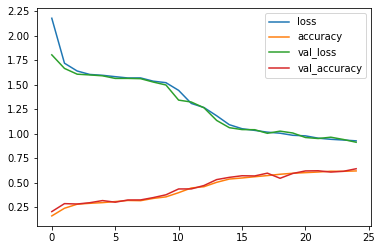

In [129]:
pd.DataFrame(non_norm_history.history).plot()

In [124]:
# try to normize our data
train_data_norm = train_data /255.0
test_data_norm = test_data /255.0
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [131]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])


model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model_2.fit(train_data_norm,train_labels,epochs=25,validation_data=(test_data_norm,test_labels))

Epoch 1/25
  24/1875 [..............................] - ETA: 8s - loss: 2.2312 - accuracy: 0.1602

2022-07-06 21:45:23.200714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1865/1875 [============================>.] - ETA: 0s - loss: 1.0984 - accuracy: 0.6269

2022-07-06 21:45:31.587181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 10s 5ms/step - loss: 1.0966 - accuracy: 0.6275 - val_loss: 0.7959 - val_accuracy: 0.7328
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7063 - accuracy: 0.7535 - val_loss: 0.6690 - val_accuracy: 0.7627
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6184 - accuracy: 0.7861 - val_loss: 0.6178 - val_accuracy: 0.7841
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5817 - accuracy: 0.7986 - val_loss: 0.5948 - val_accuracy: 0.7950
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5615 - accuracy: 0.8047 - val_loss: 0.5959 - val_accuracy: 0.7876
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5451 - accuracy: 0.8095 - val_loss: 0.5637 - val_accuracy: 0.8024
Epoch 7/25
 520/1875 [=======>......................] - ETA: 6s - loss: 0.5332 - accuracy: 0.8114